In [15]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
x_train = np.loadtxt(r"C:\Users\rajes\OneDrive\Documents\Image Classification CNN Keras Dataset\input.csv",delimiter = ',')
y_train = np.loadtxt(r"C:\Users\rajes\OneDrive\Documents\Image Classification CNN Keras Dataset\labels.csv",delimiter = ',')
x_test = np.loadtxt(r"C:\Users\rajes\OneDrive\Documents\Image Classification CNN Keras Dataset\input_test.csv",delimiter = ',')
y_test = np.loadtxt(r"C:\Users\rajes\OneDrive\Documents\Image Classification CNN Keras Dataset\labels_test.csv",delimiter = ',')

In [3]:
print('shape of x_train is',x_train.shape)
print('shape of y_train is', y_train.shape)
print('shape of x_test is', x_test.shape)
print('shape of y_test is', y_test.shape)

shape of x_train is (2000, 30000)
shape of y_train is (2000,)
shape of x_test is (400, 30000)
shape of y_test is (400,)


### Normalization

In [4]:
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)
x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)
x_train=x_train/255.0
x_test=x_test/255.0

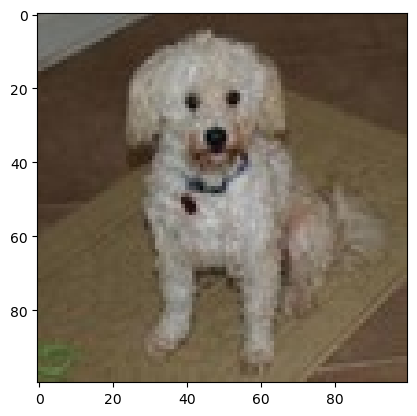

In [6]:
idx=random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

### Model Building

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 98, 98, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 153664)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │       9,834,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,836,417 (37.52 MB)

 Trainable params: 9,836,417 (37.52 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [55]:
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'] )
model.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.9968 - loss: 0.0475
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.9986 - loss: 0.0355
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.9986 - loss: 0.0279
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.9988 - loss: 0.0283
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.9983 - loss: 0.0224
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.9973 - loss: 0.0240
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.9972 - loss: 0.0196
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.9979 - loss: 0.0195
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.9986 - loss: 0.0169
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.9988 - loss: 0.0176


### Evaluation

In [56]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6836 - loss: 1.0827


[1.103460669517517, 0.6725000143051147]

### Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Our Model Says It Is :  Dog


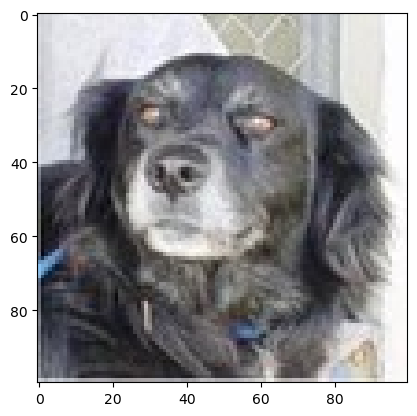

In [63]:
sample=random.randint(0,len(y_test))
plt.imshow(x_test[sample,:])
y_pred=model.predict(x_test[sample,:].reshape(1,100,100,3))
y_pred=y_pred>0.5
if(y_pred==0):
    pred="Dog"
else:
    pred="Cat"  
print("Our Model Says It Is : ",pred)